### 2D CNN Model

In [1]:
import pandas as pd
import numpy as np

import keras
from keras.models import Model, Sequential
from keras.utils import np_utils
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.callbacks import EarlyStopping

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

/Users/Nahel/anaconda3/envs/NN/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
def Data_Prep():
    data = pd.read_csv('./2D_120.csv')

    target = data.AGE.copy(deep=True)
    data = data.drop(['Unnamed: 0','AGE'],axis=1)

    X_train, X_test, y_train, y_test = train_test_split(
    data,target,test_size=0.2,random_state=42)

    mm = MinMaxScaler()
    X_train = mm.fit_transform(X_train)
    X_test  = mm.transform(X_test)

    X_train = X_train.reshape(X_train.shape[0], 256, 150, 1)
    X_test  = X_test.reshape(X_test.shape[0], 256, 150, 1)
    return X_train, X_test, y_train, y_test

In [4]:
X_train, X_test, y_train, y_test = Data_Prep()

In [5]:
X_test.shape

(104, 256, 150, 1)

In [6]:
X_train.shape

(412, 256, 150, 1)

In [10]:
model = Sequential()

model.add(Convolution2D(filters = 15,           
                        kernel_size = (5,5),    
                        activation='relu', 
                        input_shape=X_train.shape[1:]))

model.add(MaxPooling2D())     

model.add(Convolution2D(filters =30,        
                        kernel_size = (4,4),   
                        activation='relu'))

model.add(MaxPooling2D())

model.add(Dropout(0.25)) 

model.add(Flatten())

model.add(Dense(512, activation='relu'))     

model.add(Dense(1, activation='relu'))

model.compile(loss='mse',
              optimizer='adam')

early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, mode='auto')

In [ ]:
model.fit(X_train, y_train, 
          batch_size=128,
          epochs=10, 
          callbacks=[early_stop], 
          validation_data =(X_test, y_test),
          verbose=1)

Train on 412 samples, validate on 104 samples
Epoch 1/10
412/412 [==============================] - 91s 221ms/step - loss: 194.6005 - val_loss: 181.5395
Epoch 2/10
412/412 [==============================] - 100s 243ms/step - loss: 178.8406 - val_loss: 169.7632
Epoch 3/10
256/412 [=================>............] - ETA: 3:05 - loss: 166.4398

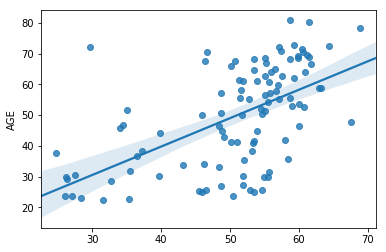

In [12]:
sns.regplot(model.predict(X_test), y_test)
#sns.plt.show()